In [1]:
import json
import random
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from pathlib import Path
from collections import defaultdict
from features.utils import build_mapping_to_ids

warnings.filterwarnings('ignore')

# Data

### Get all problems

In [2]:
dataset = pd.read_csv("data/java_2000_dataset_code.csv")

In [3]:
# Drop rows where null values exist in 'focal_class_code' or 'test_class_code'
dataset.dropna(subset=['focal_class_code', 'test_class_code'], inplace=True)

In [4]:
# dataset.head()

In [5]:
# dataset.info()

In [6]:
# dataset.isnull().sum()

In [7]:
print("<<<<<<<<<<<<<<<<<<<PART 1 FINISHED>>>>>>>>>>>>>>>>>>>>>>>>")

<<<<<<<<<<<<<<<<<<<PART 1 FINISHED>>>>>>>>>>>>>>>>>>>>>>>>


# Build dataset

In [8]:
from features import *
from sklearn.feature_selection import mutual_info_regression

In [9]:
# codes = dataset['focal_class_code'].values  # Assuming 'code_column' is the name of your column with the code

codes_with_ids = [{'repo_id': row['repo_id'], 'code': row['focal_class_code']} for index, row in dataset.iterrows()]

samples = calculate_features_for_files(codes_with_ids)

In [10]:
print("<<<<<<<<<<<<<<<<<<<PART 2 FINISHED>>>>>>>>>>>>>>>>>>>>>>>>")

<<<<<<<<<<<<<<<<<<<PART 2 FINISHED>>>>>>>>>>>>>>>>>>>>>>>>


### Minor EDA for samples

In [11]:
# samplesdf = pd.DataFrame(samples) 

In [13]:
import dask.dataframe as dd

# Convert the samples list to a Dask DataFrame
samplesdf = dd.from_pandas(pd.DataFrame(samples), npartitions=10)  # Adjust npartitions based on your dataset and system


In [14]:
samplesdf.shape

(Delayed('int-5d2d9989-f713-4189-97ab-474bb643ab8e'), 14289)

In [15]:
# column_name = 'repo_id'
# # Pop the column out of the DataFrame
# desired_column = samplesdf.pop(column_name)
# # Reinsert it at the beginning of the DataFrame
# samplesdf.insert(0, column_name, desired_column)

In [16]:
samplesdf.head()

,repo_id,WordUnigramTF_csv,WordUnigramTF_converter,WordUnigramTF_de,WordUnigramTF_bytefish,WordUnigramTF_jtinycsvparser,WordUnigramTF_typeconverter,WordUnigramTF_ITypeConverter,WordUnigramTF_utils,WordUnigramTF_StringUtils,...,WordUnigramTF_getOnlyThreadPoolUtilization,WordUnigramTF_sampleCommandUtilization,WordUnigramTF_sampleThreadPoolUtilization,WordUnigramTF_commandUtilizationPerKey,WordUnigramTF_threadPoolUtilizationPerKey,WordUnigramTF_hystrixUtilization,WordUnigramTF_getCommandUtilizationMap,WordUnigramTF_getThreadPoolUtilizationMap,WordUnigramTF_doThrow,WordUnigramTF_RollingCollapserBatchSizeDistributionStream
0,58314354,0.016393,0.016393,0.016393,0.016393,0.016393,0.016393,0.032787,0.016393,0.032787,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,58314354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016129,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,58314354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016129,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,58314354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016129,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,58314354,0.029703,0.009901,NaN,NaN,NaN,NaN,NaN,0.009901,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# columns_to_check = [
#     "WordUnigramTF",
#     "In(numkeywords/length)",
#     "In(numTernary/length)",
#     "In(numTokens/length)",
#     "In(numComments/length)",
#     "In(numLiterals/length)",
#     "In(numKeywords/length)",
#     "In(numFunctions/length)",
#     "In(numMacros/length)",
#     "nestingDepth",
#     "branchingFactor",
#     "avgParams",
#     "stdDevNumParams",
#     "avgLineLength",
#     "stdDevLineLength",
#     "In(numTabs/length)",
#     "In(numSpaces/length)",
#     "In(numEmptyLines/length)",
#     "whiteSpaceRatio",
#     "newLineBeforeOpenBrace",
#     "tabsLeadLines",
#     "MaxDepthASTNode",
#     "ASTNodeBigramsTF",
#     "ASTNodeTypesTF",
#     "ASTNodeTypesTFIDF",
#     "ASTNodeTypeAvgDep",
#     "cppKeywords",
#     "CodeInASTLeavesTF",
#     "CodeInASTLeavesTFIDF",
#     "CodeInASTLeavesAvgDep"
# ]

# # Function to clean column names
# def clean_column_name(name):
#     return name.replace(" ", "").replace("In", "ln").lower()

# # Clean DataFrame column names
# xdf.columns = [clean_column_name(name) for name in xdf.columns]

# # Check each column
# for col in columns_to_check:
#     cleaned_col = clean_column_name(col)
#     if cleaned_col in xdf.columns:
#         print(f"Column '{col}' exists in the DataFrame.")
#     else:
#         print(f"Column '{col}' does NOT exist in the DataFrame.")

In [18]:
print("<<<<<<<<<<<<<<<<<<<PART 3 FINISHED>>>>>>>>>>>>>>>>>>>>>>>>")

<<<<<<<<<<<<<<<<<<<PART 3 FINISHED>>>>>>>>>>>>>>>>>>>>>>>>


## Build X and Y 

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
import numpy as np

In [20]:
y = samplesdf['repo_id']
X = samplesdf.drop(columns=['repo_id'])

In [21]:
# X.fillna(0, inplace=True)
X = X.fillna(0)
y = y.fillna(0)

In [22]:
print("<<<<<<<<<<<<<<<<<<<PART 4 FINISHED>>>>>>>>>>>>>>>>>>>>>>>>")

<<<<<<<<<<<<<<<<<<<PART 4 FINISHED>>>>>>>>>>>>>>>>>>>>>>>>


### Select the best 1500 features according to mutual information

In [23]:
# Convert to numpy array for mutual information calculation if needed

# X_np = X.to_numpy(dtype=np.float32)

# Replace inf/-inf with large finite numbers (if infinities are expected)
# X_np = np.where(np.isinf(X_np), np.finfo(np.float32).max, X_np)

#--------------------

X_small = X.compute()  # Converts the Dask DataFrame to a pandas DataFrame
y_small = y.compute()

X_small = X_small.replace([np.inf, -np.inf], np.finfo(np.float32).max)
X_small[X_small > np.finfo(np.float32).max] = np.finfo(np.float32).max
X_small[X_small < np.finfo(np.float32).min] = np.finfo(np.float32).min

X_np = X_small.astype(np.float32).to_numpy()
y_np = y_small.to_numpy()

In [24]:
print("<<<<<<<<<<<<<<<<<<<PART 5 FINISHED>>>>>>>>>>>>>>>>>>>>>>>>")

<<<<<<<<<<<<<<<<<<<PART 5 FINISHED>>>>>>>>>>>>>>>>>>>>>>>>


In [25]:
# Calculate mutual information
# mi = mutual_info_regression(X_np, y, random_state=0)
# mi /= np.max(mi)  # Normalize mutual information scores for better comparison

# # Select the top 1500 features
# mi_indices = np.argsort(mi)[-1500:]  # Get indices of top 1500 features
# selected_features = X.columns[mi_indices]  # Get feature names
# X = X[selected_features]  # Subset X to keep only selected features

# print(f'Number of samples: {X.shape[0]}')
# print(f'Number of features: {X.shape[1]}')

#------------------------
# # Calculate mutual information
mi = mutual_info_regression(X_np, y.compute(), random_state=0)  # Ensure y is also prepared for this operation
mi /= np.max(mi)  # Normalize mutual information scores for better comparison

# Select the top 1500 features
mi_indices = np.argsort(mi)[-1500:]  # Get indices of top 1500 features
selected_features = X_small.columns[mi_indices]  # Get feature names
X_selected = X_small[selected_features]  # Subset X to keep only selected features

print(f'Number of samples: {X_selected.shape[0]}')
print(f'Number of features: {X_selected.shape[1]}')


Number of samples: 1914
Number of features: 1500


In [35]:
X = X_selected

In [36]:
print("<<<<<<<<<<<<<<<<<<<PART 6 FINISHED>>>>>>>>>>>>>>>>>>>>>>>>")

<<<<<<<<<<<<<<<<<<<PART 6 FINISHED>>>>>>>>>>>>>>>>>>>>>>>>


In [37]:
X.head()

,WordUnigramTF_configuredTheme,WordUnigramTF_showSizePanelIcon,WordUnigramTF_MethodSignature,WordUnigramTF_articles,WordUnigramTF_MapStoreFactory,WordUnigramTF_pragmaSynchronous,WordUnigramTF_parent,WordUnigramTF_getGamesLocator,ASTNodeBigramsTF_SynchronizedStatement_ClassReference,WordUnigramTF_DataSetValidatorProvider,...,ln(numKeywords/length),ASTNodeTypesTF_ReferenceType,ln(num_package/length),ln(num_class/length),ln(numTokens/length),ln(numEmptyLines/length),ln(numTernary/length),stdDevLineLength,whiteSpaceRatio,ln(numSpaces/length)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.915218,0.164179,-7.134094,-6.440947,-3.023220,0.010367,-30.159945,26.861520,0.290123,0.187400
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.948033,0.235294,-6.838405,-6.838405,-2.711271,0.009646,-29.864256,30.402958,0.211688,0.141479
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.948033,0.235294,-6.838405,-6.838405,-2.711271,0.009646,-29.864256,30.402958,0.211688,0.141479
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.948033,0.235294,-6.838405,-6.838405,-2.711271,0.009646,-29.864256,30.402958,0.211688,0.141479
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.754739,0.280000,-7.462789,-7.462789,-2.847669,0.007463,-30.488640,43.037774,0.181017,0.129736


In [38]:
X.isnull().all(axis=1).sum() # Rows with all columns null

0

In [39]:
X.isnull().sum()

WordUnigramTF_configuredTheme      0
WordUnigramTF_showSizePanelIcon    0
WordUnigramTF_MethodSignature      0
WordUnigramTF_articles             0
WordUnigramTF_MapStoreFactory      0
                                  ..
ln(numEmptyLines/length)           0
ln(numTernary/length)              0
stdDevLineLength                   0
whiteSpaceRatio                    0
ln(numSpaces/length)               0
Length: 1500, dtype: int64

In [40]:
print("<<<<<<<<<<<<<<<<<<<PART 7 FINISHED>>>>>>>>>>>>>>>>>>>>>>>>")

<<<<<<<<<<<<<<<<<<<PART 7 FINISHED>>>>>>>>>>>>>>>>>>>>>>>>


# Classification

In [31]:
from sklearn.model_selection import train_test_split

In [43]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

y = y.compute()  # Convert Dask Series to Pandas Series

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y_pd)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 1.0000


In [45]:
print("<<<<<<<<<<<<<<<<<<<PART 8 FINISHED>>>>>>>>>>>>>>>>>>>>>>>>")

<<<<<<<<<<<<<<<<<<<PART 8 FINISHED>>>>>>>>>>>>>>>>>>>>>>>>


# Validation

### Cross-Validation

In [47]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5)

print("CV Accuracy Scores:", cv_scores)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

CV Accuracy Scores: [0.99738903 1.         1.         0.99738903 0.9947644 ]
CV Accuracy: 1.00 (+/- 0.00)


### Precision, Recall, and F1 Score

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     6766558       1.00      1.00      1.00        35
    16611556       1.00      1.00      1.00        35
    17898911       1.00      1.00      1.00        68
    34861263       1.00      1.00      1.00         1
    41263775       1.00      1.00      1.00        55
    41307987       1.00      1.00      1.00         3
    42557838       1.00      1.00      1.00        29
    44512524       1.00      1.00      1.00        80
    58314354       1.00      1.00      1.00         1
    59021106       1.00      1.00      1.00         5
    59801168       1.00      1.00      1.00         1
    81368488       1.00      1.00      1.00        37
   102814088       1.00      1.00      1.00         4
   173924701       1.00      1.00      1.00         1
   181421086       1.00      1.00      1.00        26
   183214896       1.00      1.00      1.00         1
   188705852       1.00      1.00      1.00         1

    accuracy              

### ROC Curve and AUC Score

In [49]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

# Binarize y_test and y_pred for multi-class ROC AUC calculation
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
y_pred_proba = rf.predict_proba(X_test)

# Compute AUC
roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, multi_class="ovr")

print("ROC AUC Score:", roc_auc)

# For plotting ROC curves for each class, you'd iterate through classes and calculate ROC curve per class

ROC AUC Score: 1.0


### Feature Importances

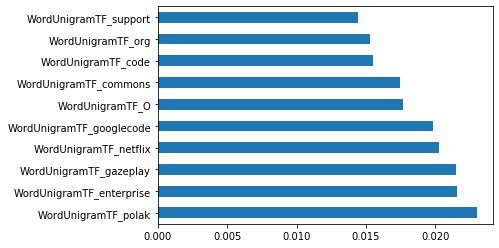

In [50]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')  # Top 10 features
plt.show()

In [51]:
print("<<<<<<<<<<<<<<<<<<<PART 9 FINISHED>>>>>>>>>>>>>>>>>>>>>>>>")

<<<<<<<<<<<<<<<<<<<PART 9 FINISHED>>>>>>>>>>>>>>>>>>>>>>>>
